In [3]:
from keras.models import Sequential
from keras import layers

from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [5]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [7]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [8]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
# Number of features
print(input_dim)

2000


In [9]:
model = Sequential()
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 9s 31ms/step - loss: 0.8800 - acc: 0.5051 - val_loss: 0.8431 - val_acc: 0.5127
Epoch 2/5
293/293 [==============================] - 8s 27ms/step - loss: 0.7878 - acc: 0.5824 - val_loss: 0.8457 - val_acc: 0.5197
Epoch 3/5
293/293 [==============================] - 9s 30ms/step - loss: 0.6813 - acc: 0.6825 - val_loss: 0.8724 - val_acc: 0.5141
Epoch 4/5
293/293 [==============================] - 8s 26ms/step - loss: 0.4894 - acc: 0.8184 - val_loss: 0.9591 - val_acc: 0.5120
Epoch 5/5
293/293 [==============================] - 8s 26ms/step - loss: 0.2826 - acc: 0.9279 - val_loss: 1.0656 - val_acc: 0.5001


In [10]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [11]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])


In [12]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 536s 2s/step - loss: 1.0552 - acc: 0.4861 - val_loss: 0.8626 - val_acc: 0.5018
Epoch 2/5
293/293 [==============================] - 742s 3s/step - loss: 0.8231 - acc: 0.5385 - val_loss: 0.8482 - val_acc: 0.4999
Epoch 3/5
293/293 [==============================] - 520s 2s/step - loss: 0.7362 - acc: 0.6332 - val_loss: 0.8736 - val_acc: 0.4967
Epoch 4/5
293/293 [==============================] - 437s 1s/step - loss: 0.5978 - acc: 0.7318 - val_loss: 0.9794 - val_acc: 0.4879
Epoch 5/5
293/293 [==============================] - 398s 1s/step - loss: 0.4465 - acc: 0.8179 - val_loss: 1.1488 - val_acc: 0.4840


In [13]:
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer
import numpy as np
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences= twenty_train.data
y=twenty_train.target

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# sentences = tokenizer.texts_to_matrix(sentences)

from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
34/34 [==============================] - 243s 7s/step - loss: 10.2244 - acc: 0.0588 - val_loss: 3.1557 - val_acc: 0.0537
Epoch 2/5
34/34 [==============================] - 234s 7s/step - loss: 2.9864 - acc: 0.0679 - val_loss: 2.9737 - val_acc: 0.0612
Epoch 3/5
34/34 [==============================] - 270s 8s/step - loss: 2.9446 - acc: 0.0692 - val_loss: 2.9763 - val_acc: 0.0806
Epoch 4/5
34/34 [==============================] - 293s 9s/step - loss: 2.8760 - acc: 0.0869 - val_loss: 2.8451 - val_acc: 0.0877
Epoch 5/5
34/34 [==============================] - 319s 9s/step - loss: 2.7397 - acc: 0.1068 - val_loss: 2.6963 - val_acc: 0.1248


In [15]:
x=n.predict_classes(X_test[[4],:])
print("Actual Prediction",y_test[4],"Predicted Prediction",x)

Actual Prediction 4 Predicted Prediction [2]


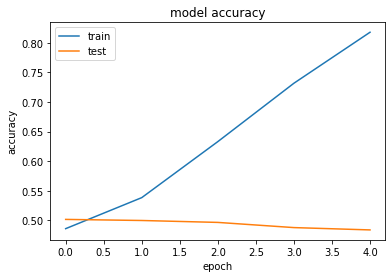

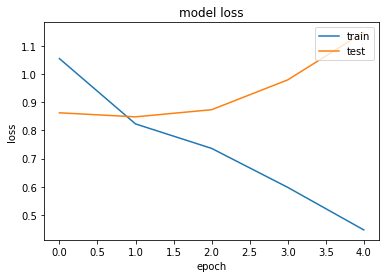

In [16]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()